In [113]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [114]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [115]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]


In [116]:

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [117]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


In [118]:

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [119]:
# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
display(table_train.head())
table_test = pd.crosstab(y_test, predict_test, margins=True)
display(table_test.head())

col_0,0.0,1.0,All
partner,,,
0.0,4167,341,4508
1.0,1291,1533,2824
All,5458,1874,7332


col_0,0.0,1.0,All
partner,,,
0.0,454,51,505
1.0,151,159,310
All,605,210,815


In [120]:
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


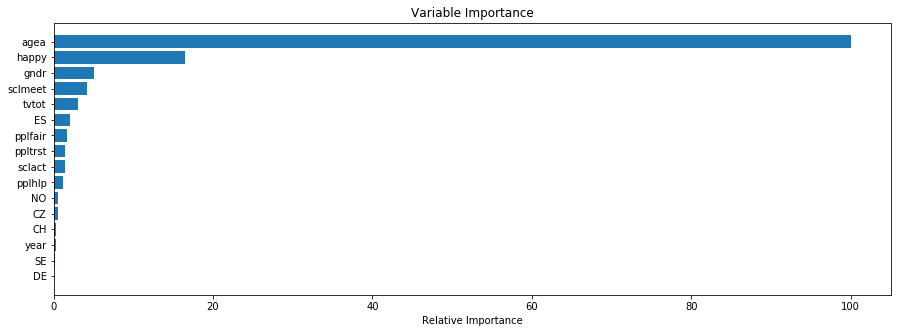

In [121]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=[15,5])
#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

In [122]:
dfn = df.drop(['idno', 'cntry', 'year'], axis=1)
dfn.head(2)

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0


# Attempt with only the best 5 features listed above

In [123]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}



def train_and_score(X=None, Y=None, testpct=.1):
    offset = int(X.shape[0] * (1-testpct))
    X_train, y_train = X[:offset], y[:offset]
    X_test, y_test = X[offset:], y[offset:]
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

    print((
        'Training set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
    ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

    

In [124]:
features = ['agea', 'happy', 'gndr', 'sclmeet', 'tvtot']
X = df[features]
Y = df['partner']

In [125]:
train_and_score(X,Y)

Training set accuracy:
Percent Type I errors: 0.04896344789961811
Percent Type II errors: 0.1815330060010911

Test set accuracy:
Percent Type I errors: 0.05766871165644172
Percent Type II errors: 0.2


In [126]:
train_and_score(X,Y,.5)

Training set accuracy:
Percent Type I errors: 0.03879204517554628
Percent Type II errors: 0.18119322366805793

Test set accuracy:
Percent Type I errors: 0.05768286696121748
Percent Type II errors: 0.19342169857633776


In [127]:
#Not real different. Try with more depth
def get_params():
    params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'deviance'}
    return params

train_and_score(X,Y,.5)

Training set accuracy:
Percent Type I errors: 0.03879204517554628
Percent Type II errors: 0.18119322366805793

Test set accuracy:
Percent Type I errors: 0.05768286696121748
Percent Type II errors: 0.19342169857633776


In [128]:
#not a good idea, let's set that back and try more estimators
def get_params():
    params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance'}
    return params


In [129]:
train_and_score(X,Y, .5)

Training set accuracy:
Percent Type I errors: 0.03879204517554628
Percent Type II errors: 0.18119322366805793

Test set accuracy:
Percent Type I errors: 0.05768286696121748
Percent Type II errors: 0.19342169857633776


In [130]:
#With these features, there's not much more info to learn.
#Let's see what lasso has to say

In [131]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
Y = df['partner'] -1

train_and_score(X,Y, .5)

Training set accuracy:
Percent Type I errors: 0.03952860299533514
Percent Type II errors: 0.17358212619690647

Test set accuracy:
Percent Type I errors: 0.062346588119784
Percent Type II errors: 0.19170348551791852


In [132]:
lasso = LogisticRegression(penalty='l1', C=1)

offset = int(X.shape[0] * (.9))
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

lassofit = lasso.fit(X_train, y_train)
print("Just for fun:", lassofit.score(X_test, y_test))


display(lassofit.coef_)

Just for fun: 0.7202453987730061


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[ 0.02308615, -0.0266323 ,  0.00819386,  0.03104319, -0.23076077,
         0.24779459, -0.00445327,  0.16367796, -0.02916152]])

In [133]:
#Lasso didn't remove any. 
#Instead, let's set up a loop. Each pass fits and scores a model, then removes the least important feature until the dataframe
#only has one column left
from sklearn.model_selection import train_test_split

In [134]:
Y = df['partner'] -1
it = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
while len(it.columns) >= 1:
    X_train, X_test, y_train, y_test = train_test_split(it, Y, test_size=0.33)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_test = clf.predict(X_test)
    table_test = pd.crosstab(y_test, predict_test, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    print("Features: " , [x for x in it.columns])
    print((
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n'
    ).format(test_tI_errors, test_tII_errors))
    importances = list(clf.feature_importances_)
    dropcol = importances.index(min(importances))
    it = it.drop(it.columns[dropcol], axis=1)
    
    
    
    

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.051320193380438826
Percent Type II errors: 0.2026775753068055

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.05764224618817404
Percent Type II errors: 0.1885459278542209

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.05355150613611008
Percent Type II errors: 0.19003346969133506

Features:  ['tvtot', 'pplfair', 'happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.06284864261807363
Percent Type II errors: 0.1911491260691707

Features:  ['tvtot', 'happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.0572703607288955
Percent Type II errors: 0.1911491260691707

Features:  ['happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.05280773521755299
Percent Type II errors: 0.189289698772778

Features:  ['happy', 'sclmeet', 'agea']


In [135]:
#None of the features besides age seem to consistently bring value. Let's try the same thing with a more gradual learning rate
params = {'n_estimators': 500,
         'max_depth': 3,
         'loss': 'deviance',
         'learning_rate': .5}

Y = df['partner'] -1
it = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
while len(it.columns) >= 1:
    X_train, X_test, y_train, y_test = train_test_split(it, Y, test_size=0.33)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_test = clf.predict(X_test)
    table_test = pd.crosstab(y_test, predict_test, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    print("Features: " , [x for x in it.columns])
    print((
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n'
    ).format(test_tI_errors, test_tII_errors))
    importances = list(clf.feature_importances_)
    dropcol = importances.index(min(importances))
    it = it.drop(it.columns[dropcol], axis=1)

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.10821866865005578
Percent Type II errors: 0.18073633320937152

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'agea']
Percent Type I errors: 0.11082186686500557
Percent Type II errors: 0.1833395314243213

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.09594644849386388
Percent Type II errors: 0.18668650055782818

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.09408702119747119
Percent Type II errors: 0.17664559315730755

Features:  ['tvtot', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.09185570844179992
Percent Type II errors: 0.1840833023428784

Features:  ['tvtot', 'pplhlp', 'happy', 'agea']
Percent Type I errors: 0.08925251022685013
Percent Type II errors: 0.185198958720714

Features:  ['tvtot', 'happy'

In [136]:
#age still a winner, but the rest of the column combinations got worse. Le'ts try a lower value than default this time:

params = {'n_estimators': 500,
         'max_depth': 3,
         'loss': 'deviance',
         'learning_rate': .01}

Y = df['partner'] -1
it = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
while len(it.columns) >= 1:
    X_train, X_test, y_train, y_test = train_test_split(it, Y, test_size=0.33)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_test = clf.predict(X_test)
    table_test = pd.crosstab(y_test, predict_test, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    print("Features: " , [x for x in it.columns])
    print((
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n'
    ).format(test_tI_errors, test_tII_errors))
    importances = list(clf.feature_importances_)
    dropcol = importances.index(min(importances))
    it = it.drop(it.columns[dropcol], axis=1)

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.04165117143919673
Percent Type II errors: 0.198214949795463

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.03867608776496839
Percent Type II errors: 0.20639642989959092

Features:  ['tvtot', 'pplfair', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.054667162513945704
Percent Type II errors: 0.17999256229081442

Features:  ['tvtot', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.04871699516548903
Percent Type II errors: 0.19598363703979174

Features:  ['tvtot', 'happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.046113796950539236
Percent Type II errors: 0.20044626255113426

Features:  ['tvtot', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.05206396429899591
Percent Type II errors: 0.20193380438824843

Features:  ['happy', 'sclmeet', 'a

In [137]:
#Not really better than the default of .1 learning_rate. reset that to default, and do 75% subsampling
params = {'n_estimators': 500,
         'max_depth': 3,
         'loss': 'deviance',
         'learning_rate': .1,
         'subsample': .75}

Y = df['partner'] -1
it = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
while len(it.columns) >= 1:
    X_train, X_test, y_train, y_test = train_test_split(it, Y, test_size=0.33)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_test = clf.predict(X_test)
    table_test = pd.crosstab(y_test, predict_test, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    print("Features: " , [x for x in it.columns])
    print((
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n'
    ).format(test_tI_errors, test_tII_errors))
    importances = list(clf.feature_importances_)
    dropcol = importances.index(min(importances))
    it = it.drop(it.columns[dropcol], axis=1)

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.07549274823354407
Percent Type II errors: 0.1788769059129788

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'agea']
Percent Type I errors: 0.07400520639642989
Percent Type II errors: 0.1833395314243213

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.08032725920416511
Percent Type II errors: 0.1885459278542209

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.06396429899590926
Percent Type II errors: 0.18482707326143547

Features:  ['tvtot', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.07065823726292302
Percent Type II errors: 0.17478616586091483

Features:  ['pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.06545184083302343
Percent Type II errors: 0.18445518780215694

Features:  ['pplhlp', 'ha

In [138]:
#50% subsampling?
params = {'n_estimators': 500,
         'max_depth': 3,
         'loss': 'deviance',
         'learning_rate': .1,
         'subsample': .5}

Y = df['partner'] -1
it = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
while len(it.columns) >= 1:
    X_train, X_test, y_train, y_test = train_test_split(it, Y, test_size=0.33)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_test = clf.predict(X_test)
    table_test = pd.crosstab(y_test, predict_test, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    print("Features: " , [x for x in it.columns])
    print((
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n'
    ).format(test_tI_errors, test_tII_errors))
    importances = list(clf.feature_importances_)
    dropcol = importances.index(min(importances))
    it = it.drop(it.columns[dropcol], axis=1)

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.0758646336928226
Percent Type II errors: 0.1904053551506136

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'agea']
Percent Type I errors: 0.07363332093715136
Percent Type II errors: 0.18705838601710673

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.07326143547787281
Percent Type II errors: 0.18817404239494237

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'agea']
Percent Type I errors: 0.07400520639642989
Percent Type II errors: 0.1840833023428784

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'agea']
Percent Type I errors: 0.06545184083302343
Percent Type II errors: 0.20416511714391966

Features:  ['pplfair', 'pplhlp', 'happy', 'agea']
Percent Type I errors: 0.06582372629230197
Percent Type II errors: 0.19226478244700632

Features:  ['pplhlp', 'ha

In [139]:
#different criterion?
params = {'n_estimators': 500,
         'max_depth': 3,
         'loss': 'deviance',
         'learning_rate': .01,
         'criterion': 'mse'}

Y = df['partner'] -1
it = df.drop(['cntry', 'idno', 'year', 'partner'], axis=1)
while len(it.columns) >= 1:
    X_train, X_test, y_train, y_test = train_test_split(it, Y, test_size=0.33)
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    predict_test = clf.predict(X_test)
    table_test = pd.crosstab(y_test, predict_test, margins=True)
    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    print("Features: " , [x for x in it.columns])
    print((
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n'
    ).format(test_tI_errors, test_tII_errors))
    importances = list(clf.feature_importances_)
    dropcol = importances.index(min(importances))
    it = it.drop(it.columns[dropcol], axis=1)

Features:  ['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.04685756786909632
Percent Type II errors: 0.19263666790628486

Features:  ['tvtot', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.044626255113425065
Percent Type II errors: 0.19375232428412048

Features:  ['tvtot', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.039791744142804016
Percent Type II errors: 0.2123465972480476

Features:  ['tvtot', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea']
Percent Type I errors: 0.05057642246188174
Percent Type II errors: 0.19970249163257717

Features:  ['tvtot', 'happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.04537002603198215
Percent Type II errors: 0.20490888806247676

Features:  ['happy', 'sclmeet', 'gndr', 'agea']
Percent Type I errors: 0.04276682781703235
Percent Type II errors: 0.20379323168464114

Features:  ['happy', 'gndr', 'agea'